In [155]:
import glob
from bs4 import BeautifulSoup
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from sklearn.linear_model import LogisticRegression as lg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

all_files = glob.glob("./data/*.html")

In [20]:
header = []
data = []
month = {
  "January": "1",
  "February": "2",
  "March": "3",
  "April": "4",
  "May":"5",
  "June":"6",
  "July":"7",
  "August":"8",
  "September":"9",
  "October":"10",
  "November":"11",
  "December":"12"
}
for file in all_files:
    song_soup = BeautifulSoup(open(file, encoding="utf8"),"html.parser")

    date=''
    for row in song_soup.find_all('tr'):
        th = row.find_all('th')
        new_row=[]
        if th:
            if len(header)==0:
                for _th in th:
                    if len(_th.contents) ==3:
                        header.append(_th.contents[0]+" "+_th.contents[2])
                    else:
                        header.append(_th.contents[0])
        else:
            td = row.find_all('td')
            if td:
                if len(td)==6:
                    count=0
                    for _td in td:
                        a=_td.find_all('a')
                        if a:
                            for _a in a:
                                if count==0:
                                    _a.contents[0] = _a.contents[0].split(" ")[1]+"/"+month[_a.contents[0].split(" ")[0]]
                                    date = _a.contents[0]
                                new_row.append(_a.contents[0])
                        else:
                            if count==0 and len(_td.contents)==0:
                                new_row.append(date)
                            else:
                                if len(_td.contents)>0:
                                    if count==4:
                                        revenue_num=int(''.join(_td.contents[0].split('$')[1].split(',')))
                                        if revenue_num>0:
                                            new_row.append(revenue_num)
                                    else:
                                        new_row.append(_td.contents[0])

                                else:
                                    if count!=2:
                                        new_row.append('')

                        count = count+1

        if len(new_row)==6:
            data.append(new_row)
            

with open('movies.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    for _data in data:
        writer.writerow(_data)

In [139]:
df = pd.read_csv('movies.csv', ',')
df

,Release Date,Movie,Genre,Release Type,Revenue to Date,Trailer
0,6/1,Houseguest,Comedy,Theatrical,26325256,
1,6/1,Showgirls,Drama,Theatrical,37750754,
2,11/1,Higher Learning,Drama,Theatrical,38023585,
3,13/1,Far from\r\n ...,Adventure,Theatrical,11380788,
4,13/1,Tales from the Crypt:\r\n ...,Horror,Theatrical,21089146,
...,...,...,...,...,...,...
271,29/12,Dead Man Walking,Drama,Theatrical,83088295,
272,29/12,Mr. Holland’s Opus,Drama,Theatrical,106282604,
273,29/12,Restoration,Drama,Theatrical,4100000,
274,29/12,Richard III,Drama,Theatrical,4199334,


In [140]:
# הדאטא שלנו מסוג חיזוי
# אנחנו רוצים לנחש את העמודה Revenue to Date
#  לנו אין data leakage
# מודל 0 יחזיר את כל הממוצע של עמודת הרווחים ואז לראות מה יותר גדול
# ניתן לנחש שסרטי קומדיה הם יותר רווחים ושסרטים שיוצאים בקיץ יותר רווחים - חודשי יולי אוגוסט

In [141]:
df.Genre.unique()

Geners = {
  "Romantic Comedy": "1",
  "Comedy": "2",
  "Adventure": "3",
  "Western": "4",
  "Action":"5",
  "Horror":"6",
  "Thriller/Suspense":"7",
  "Drama":"8",
  "Black Comedy":"9",
  "Documentary":"10"
}
count_g=0
for genre in df.Genre:
  df.Genre[count_g] = Geners[genre]
  count_g+=1

# only monthes
count_d=0
for release_date in df["Release Date"]:
  df["Release Date"][count_d] = release_date.split("/")[1]
  count_d+=1


<ipython-input-141-e006be17cc4c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Genre[count_g] = Geners[genre]
<ipython-input-141-e006be17cc4c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Release Date"][count_d] = release_date.split("/")[1]


In [142]:
df

,Release Date,Movie,Genre,Release Type,Revenue to Date,Trailer
0,1,Houseguest,2,Theatrical,26325256,
1,1,Showgirls,8,Theatrical,37750754,
2,1,Higher Learning,8,Theatrical,38023585,
3,1,Far from\r\n ...,3,Theatrical,11380788,
4,1,Tales from the Crypt:\r\n ...,6,Theatrical,21089146,
...,...,...,...,...,...,...
271,12,Dead Man Walking,8,Theatrical,83088295,
272,12,Mr. Holland’s Opus,8,Theatrical,106282604,
273,12,Restoration,8,Theatrical,4100000,
274,12,Richard III,8,Theatrical,4199334,


In [143]:
df = df.drop(['Release Type', 'Trailer'],axis=1)
y = df["Release Date"].to_numpy()
x = df.drop(['Release Date', 'Movie'],axis=1).to_numpy()
# x = df[['Revenue to Date']]

# x = df['Release Date'].to_numpy()


In [144]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [145]:
log = lg()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.036036036036036036


['5' '2' '9' '4' '12' '3' '10' '9' '1' '5' '1' '9' '7' '8' '10' '6' '6'
 '7' '3' '5' '8' '12' '4' '6' '1' '2' '12' '12' '4' '4' '12' '12' '8' '9'
 '1' '9' '3' '4' '9' '9' '5' '6' '6' '3' '12' '9' '7' '6' '10' '11' '6'
 '2' '10' '11' '9' '7' '3' '7' '6' '2' '3' '8' '10' '6' '12' '12' '12'
 '12' '12' '2' '10' '5' '10' '12' '3' '12' '3' '10' '3' '9' '12' '2' '1'
 '9' '9' '6' '4' '12' '2' '2' '9' '10' '4' '5' '8' '3' '11' '5' '10' '3'
 '7' '12' '4' '3' '8' '4' '10' '11' '12' '4' '12']
['9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '8' '9' '9' '9' '9' '9'
 '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '8' '9' '9' '9' '9' '9' '9'
 '8' '9' '9' '9' '8' '9' '8' '9' '9' '9' '9' '9' '9' '9' '8' '9' '9' '9'
 '9' '9' '9' '8' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9'
 '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '8' '9' '9' '9' '9'
 '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '9'
 '9' '8' '9']


Text(0, 0.5, 'Testing Accuracy')

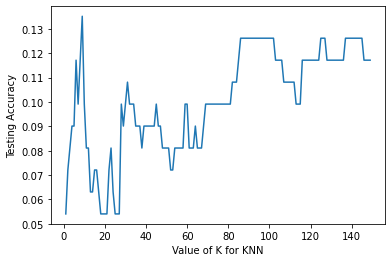

In [151]:
k_range = range(1,150)
print(y_test)
print(y_pred)
scores = []
for k in k_range:
    knn_ = knn(n_neighbors=k)
    knn_.fit(x_train, y_train)
    y_pred = knn_.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [117]:
rm = lm()
rm.fit(x_train, y_train)
r_sq = rm.score(x_test, y_test)
print('r_sq:   ', r_sq)
print("Intercept: ", rm.intercept_)
print("Coefficients:")
list(zip(x, rm.coef_))


r_sq:    0.0034499180248453998
Intercept:  6.398993235037733
Coefficients:


[(array(['2', 26325256], dtype=object), 0.08968683310448668),
 (array(['8', 37750754], dtype=object), 4.8017567497058785e-09)]

In [121]:
knn_ = knn(n_neighbors=5)
knn_.fit(x_train,y_train)
y_pred = knn_.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.08433734939759036


In [70]:
predictions=rm.predict(x_test)
print(y_test)

accuracy = metrics.mean_absolute_percentage_error(y_test, predictions)
print(accuracy)

[141247413  18517322   7008542 246100000 212400000   1111790  35627222
  50008143   5691405  27936778  11079373   4686937   3270822  20412216
   3939728   5762795  11268750      8423      1424  77224232   7737885
  11784569    113354  36216173   2459766  36466570    397566  37750754
     89720 138486431  12073560  19637147    847704  10660264  23837227
   2739002  30077111  24120194  22032635   4391379     52609  10365691
   2108367   7113576    240280   6101815  87100000 175516617    178104
   6014340    339889     81666    669276  36853222    718490 336529144
    134149   6420615  19006201  34668249    686152  11380788    560491
     82700   2513250   2517463   1900504  98393930    103351 187433328
   4199334  31390587   2477155    523707 134993774   5269757  10904930
    529135  27067247   2702000  13747279  13916665    911310]
306.5883826050509


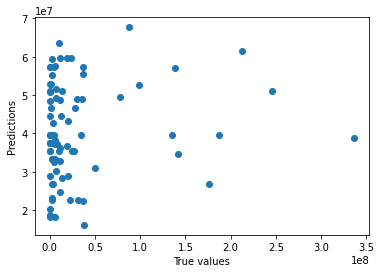

In [71]:
plt.scatter(y_test,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()


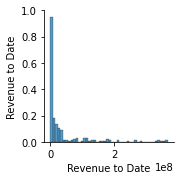

In [15]:
sns.pairplot(df)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# define model
nknn = knn()

# fit model
nknn.fit(x_train, y_train)
# make predictions
# yhat = model.predict(x_test)
# # evaluate predictions
# accuracy = accuracy_score(y_test, yhat)
# print("accuracy:   ", accuracy)

# get the most similar neighbor for each point in the test set
neighbor_ix = nknn.kneighbors(x_test, 1, return_distance=False)
ix = neighbor_ix[:,0]
print(ix)
# create a training dataset from selected instances
X_train_neigh, y_train_neigh = x_train[ix], y_train[ix]
print(X_train_neigh.shape, y_train_neigh.shape)
# create a training dataset from selected instances
X_train_neigh, y_train_neigh = x_train[ix], y_train[ix]
print(X_train_neigh.shape, y_train_neigh.shape)
# define model
model = knn()
# fit model
model.fit(X_train_neigh, y_train_neigh)
# make predictions
yhat = model.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

(193, 2) (83, 2) (193,) (83,)
[ 62  84  35   9  52 103 154  35  39  59 161 114 120  47 154 126  48 120
  41  59  68  95   9  48  94 141 159  52   9  87 159  52  67 114  39  35
  12   9 114  35  59  48  48  41  52  35 120 126 150  70 130  84 154  91
   7  73  64  73  48  84 192  68  75  48 159 132  52  27  27   5 154  59
   1  95  41  95  64 154  64  35 132  39 161]
(83, 2) (83,)
(83, 2) (83,)
Accuracy: 0.000


In [163]:
lr = SVC()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   ", accuracy)

accuracy:    0.11711711711711711
